In [1]:
import polars as pl
from pathlib import Path
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
pl.Config.set_tbl_rows(50)   # or 100

polars.config.Config

In [2]:
DATA_DIR = Path("..") / "data"

## Events Data

In [3]:
events = pl.read_parquet(DATA_DIR / "Statsbomb" / "events.parquet")
events.shape

(12188949, 112)

In [4]:
events.head()

id,index_num,period,minute,second,timestamp,duration,location_x,location_y,possession,possession_team_id,possession_team,out,off_camera,counterpress,under_pressure,type_id,type,match_id,team_id,team,player_id,player,position_id,position,play_pattern_id,play_pattern,shot_end_location_x,shot_end_location_y,shot_end_location_z,shot_statsbomb_xg,shot_outcome,shot_technique,shot_body_part,shot_type,shot_key_pass_id,shot_freeze_frame,…,dribble_overrun,dribble_no_touch,duel_type,duel_outcome,foul_committed_card,foul_committed_type,foul_committed_offensive,foul_committed_advantage,foul_committed_penalty,foul_won_defensive,foul_won_advantage,foul_won_penalty,goalkeeper_type,goalkeeper_outcome,goalkeeper_technique,goalkeeper_position,goalkeeper_body_part,goalkeeper_end_location_x,goalkeeper_end_location_y,clearance_body_part,clearance_aerial_won,clearance_head,clearance_left_foot,clearance_right_foot,interception_outcome,block_deflection,block_offensive,block_save_block,ball_recovery_offensive,ball_recovery_failure,miscontrol_aerial_won,substitution_replacement_id,substitution_replacement_name,substitution_outcome,fifty_fifty_outcome,bad_behaviour_card,injury_stoppage_in_chain
str,i32,i32,i32,i32,str,f32,f32,f32,i32,i32,str,bool,bool,bool,bool,i32,str,i32,i32,str,i32,str,i32,str,i32,str,f32,f32,f32,f32,str,str,str,str,str,str,…,bool,bool,str,str,str,str,bool,bool,bool,bool,bool,bool,str,str,str,str,str,f32,f32,str,bool,bool,bool,bool,str,bool,bool,bool,bool,bool,bool,i32,str,str,str,str,bool
"""9f6e2ecf-6685-45df-a62e-c2db30…",1,1,0,0,"""00:00:00""",0.0,null,null,1,217,"""Barcelona""",false,false,false,false,35,"""Starting XI""",15946,217,"""Barcelona""",null,null,null,null,1,"""Regular Play""",null,null,null,null,null,null,null,null,null,null,…,false,false,null,null,null,null,false,false,false,false,false,false,null,null,null,null,null,null,null,null,false,false,false,false,null,false,false,false,false,false,false,null,null,null,null,null,false
"""0300039d-150d-41e4-b29a-76602e…",2,1,0,0,"""00:00:00""",0.0,null,null,1,217,"""Barcelona""",false,false,false,false,35,"""Starting XI""",15946,206,"""Deportivo Alavés""",null,null,null,null,1,"""Regular Play""",null,null,null,null,null,null,null,null,null,null,…,false,false,null,null,null,null,false,false,false,false,false,false,null,null,null,null,null,null,null,null,false,false,false,false,null,false,false,false,false,false,false,null,null,null,null,null,false
"""491e8901-7630-4cc8-b57b-937ddd…",3,1,0,0,"""00:00:00""",0.0,null,null,1,217,"""Barcelona""",false,false,false,false,18,"""Half Start""",15946,217,"""Barcelona""",null,null,null,null,1,"""Regular Play""",null,null,null,null,null,null,null,null,null,null,…,false,false,null,null,null,null,false,false,false,false,false,false,null,null,null,null,null,null,null,null,false,false,false,false,null,false,false,false,false,false,false,null,null,null,null,null,false
"""757b85ad-ddfe-44d5-b893-c23a9f…",4,1,0,0,"""00:00:00""",0.0,null,null,1,217,"""Barcelona""",false,false,false,false,18,"""Half Start""",15946,206,"""Deportivo Alavés""",null,null,null,null,1,"""Regular Play""",null,null,null,null,null,null,null,null,null,null,…,false,false,null,null,null,null,false,false,false,false,false,false,null,null,null,null,null,null,null,null,false,false,false,false,null,false,false,false,false,false,false,null,null,null,null,null,false
"""549567bd-36de-4ac8-b8dc-6b5d3f…",5,1,0,0,"""00:00:00.575""",2.015669,61.0,40.099998,2,206,"""Deportivo Alavés""",false,false,false,false,30,"""Pass""",15946,206,"""Deportivo Alavés""",6581,"""Jonathan Rodríguez Menéndez""",16,"""Left Midfield""",9,"""From Kick Off""",null,null,null,null,null,null,null,null,null,null,…,false,false,null,null,null,null,false,false,false,false,false,false,null,null,null,null,null,null,null,null,false,false,false,false,null,false,false,false,false,false,false,null,null,null,null,null,false


In [5]:
events.schema

Schema([('id', String),
        ('index_num', Int32),
        ('period', Int32),
        ('minute', Int32),
        ('second', Int32),
        ('timestamp', String),
        ('duration', Float32),
        ('location_x', Float32),
        ('location_y', Float32),
        ('possession', Int32),
        ('possession_team_id', Int32),
        ('possession_team', String),
        ('out', Boolean),
        ('off_camera', Boolean),
        ('counterpress', Boolean),
        ('under_pressure', Boolean),
        ('type_id', Int32),
        ('type', String),
        ('match_id', Int32),
        ('team_id', Int32),
        ('team', String),
        ('player_id', Int32),
        ('player', String),
        ('position_id', Int32),
        ('position', String),
        ('play_pattern_id', Int32),
        ('play_pattern', String),
        ('shot_end_location_x', Float32),
        ('shot_end_location_y', Float32),
        ('shot_end_location_z', Float32),
        ('shot_statsbomb_xg', Float32),
      

### Pass Maps
Want to do some visualization exploration around pass maps (heat maps in the future?)

In [6]:
# Look at pass events only
passes = events.filter(pl.col("type") == "Pass").select(["period", "minute", "second", "team", "player_id", "player", "match_id", "location_x", "location_y", 'pass_end_location_x','pass_end_location_y', "pass_type", "pass_outcome", "under_pressure"])
passes.head()

#print(passes['id'][0])

period,minute,second,team,player_id,player,match_id,location_x,location_y,pass_end_location_x,pass_end_location_y,pass_type,pass_outcome,under_pressure
i32,i32,i32,str,i32,str,i32,f32,f32,f32,f32,str,str,bool
1,0,0,"""Deportivo Alavés""",6581,"""Jonathan Rodríguez Menéndez""",15946,61.0,40.099998,33.799999,28.0,"""Kick Off""",null,false
1,0,3,"""Deportivo Alavés""",6855,"""Guillermo Alfonso Maripán Loay…",15946,36.799999,27.299999,86.5,74.199997,null,"""Incomplete""",false
1,0,7,"""Barcelona""",5203,"""Sergio Busquets i Burgos""",15946,33.599998,5.9,35.099998,18.299999,"""Recovery""",null,true
1,0,8,"""Barcelona""",5470,"""Ivan Rakitić""",15946,35.099998,18.299999,36.200001,5.3,null,null,false
1,0,10,"""Barcelona""",5477,"""Ousmane Dembélé""",15946,34.299999,4.9,25.299999,1.6,null,null,false


In [7]:
passes['pass_type'].value_counts()

pass_type,count
str,u32
"""Throw-in""",157462
"""Free Kick""",97696
"""Goal Kick""",56653
null,2674704
"""Interception""",25978
"""Recovery""",324626
"""Corner""",34049
"""Kick Off""",16592


In [8]:
passes['pass_outcome'].value_counts()

pass_outcome,count
str,u32
"""Out""",68471
null,2633436
"""Pass Offside""",14141
"""Unknown""",21056
"""Injury Clearance""",4585
"""Incomplete""",646071


In [9]:
# Barcelona vs Deportive Alaves - Match ID 15946
ba_passes = passes.filter(pl.col("match_id") == 15946)

# Sergio Busquets in game 15946 - Player ID 5203
player_passes = ba_passes.filter(pl.col("player_id") == 5203)

In [10]:
player_passes = ba_passes.filter(pl.col("player_id") == 5203)

coordinates_df = player_passes.select([
    pl.col("location_x").alias("x"),
    pl.col("location_y").alias("y")
])

average_position = coordinates_df.select([
    pl.col("x").mean().alias("avg_x"),
    pl.col("y").mean().alias("avg_y")
])

print("Coordinates DataFrame:")
print(coordinates_df)
print("\nAverage Position:")
print(average_position)

Coordinates DataFrame:
shape: (83, 2)
┌───────────┬───────────┐
│ x         ┆ y         │
│ ---       ┆ ---       │
│ f32       ┆ f32       │
╞═══════════╪═══════════╡
│ 33.599998 ┆ 5.9       │
│ 79.0      ┆ 74.400002 │
│ 78.099998 ┆ 26.9      │
│ 77.5      ┆ 28.200001 │
│ 38.799999 ┆ 13.6      │
│ 51.200001 ┆ 41.900002 │
│ 84.300003 ┆ 60.700001 │
│ 49.5      ┆ 52.799999 │
│ 56.700001 ┆ 55.299999 │
│ 43.299999 ┆ 48.299999 │
│ 62.099998 ┆ 51.700001 │
│ 56.700001 ┆ 40.400002 │
│ 85.199997 ┆ 63.5      │
│ 68.300003 ┆ 28.200001 │
│ 85.800003 ┆ 30.9      │
│ 79.0      ┆ 31.200001 │
│ 62.900002 ┆ 20.700001 │
│ 64.0      ┆ 56.0      │
│ 78.300003 ┆ 42.299999 │
│ 75.099998 ┆ 41.0      │
│ 73.400002 ┆ 45.900002 │
│ 74.300003 ┆ 44.400002 │
│ 86.300003 ┆ 33.5      │
│ 82.400002 ┆ 39.299999 │
│ 70.599998 ┆ 42.5      │
│ …         ┆ …         │
│ 78.300003 ┆ 31.6      │
│ 37.900002 ┆ 0.1       │
│ 48.400002 ┆ 20.1      │
│ 84.699997 ┆ 27.299999 │
│ 26.4      ┆ 71.599998 │
│ 89.0      ┆ 19.799999 │


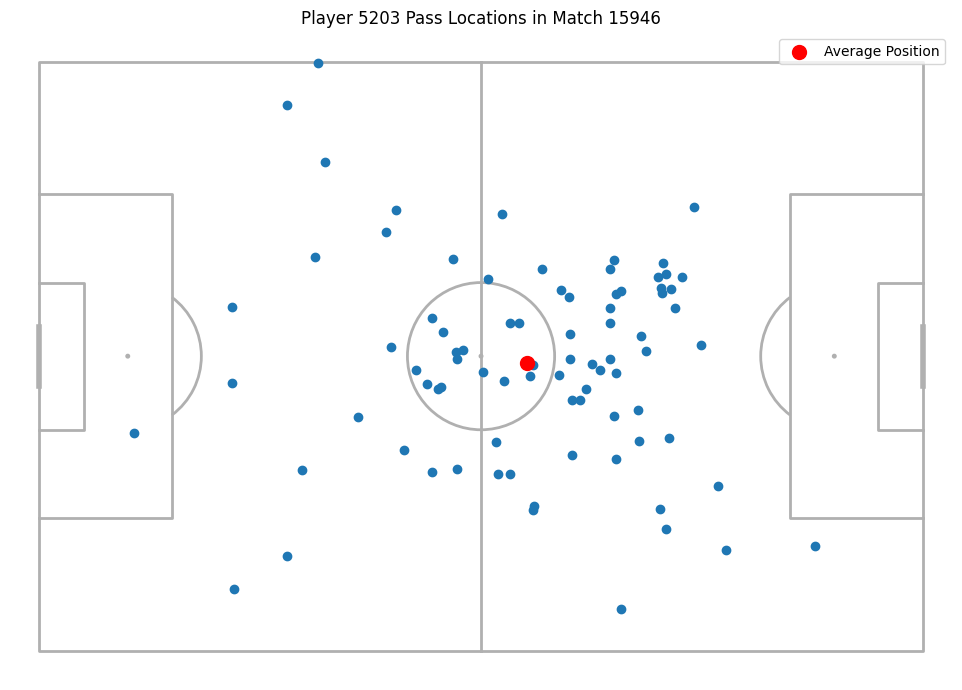

In [50]:
pitch = Pitch(pitch_type='statsbomb')
fig, ax = pitch.draw(figsize=(10, 7))

ax.scatter(coordinates_df['x'], coordinates_df['y'])
plt.title("Player 5203 Pass Locations in Match 15946")


ax.scatter(average_position['avg_x'][0], average_position['avg_y'][0], color='red', s=100, label='Average Position')
plt.legend()

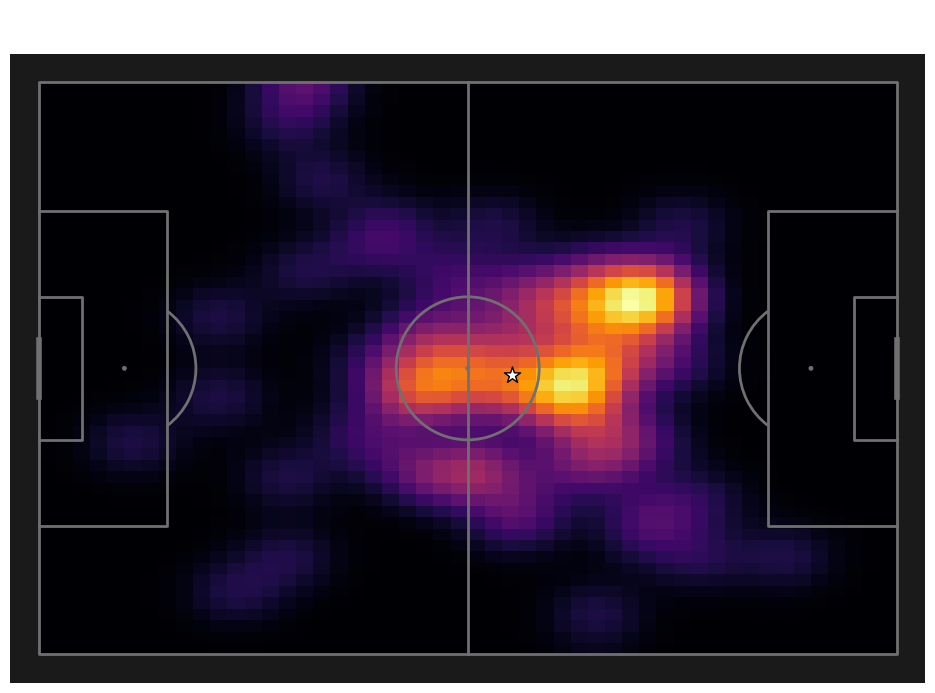

In [51]:
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from mplsoccer import Pitch

pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#1a1a1a', line_color='#707070')
fig, ax = pitch.draw(figsize=(10, 7))

bin_statistic = pitch.bin_statistic(coordinates_df['x'], coordinates_df['y'], 
                                    statistic='count', bins=(50, 50))

bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], sigma=2)

pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='inferno', edgecolors='none')
ax.scatter(average_position['avg_x'][0], average_position['avg_y'][0], 
           color='white', s=150, marker='*', edgecolors='black', label='Avg Position', zorder=4)

plt.title("Player 5203 Smoothed Pass Intensity", color='white', fontsize=16, pad=20)
plt.show()

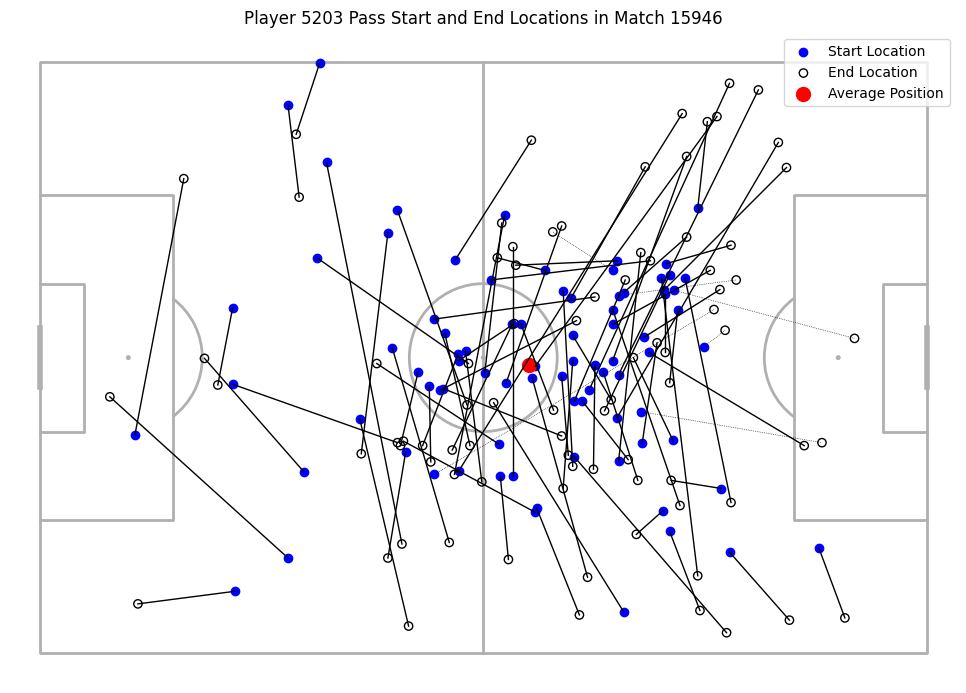

In [52]:
pitch = Pitch(pitch_type='statsbomb')
fig, ax = pitch.draw(figsize=(10, 7))

ax.scatter(player_passes['location_x'], player_passes['location_y'], color='blue', label='Start Location')
ax.scatter(player_passes['pass_end_location_x'], player_passes['pass_end_location_y'], edgecolor='black', facecolor='none', label='End Location')

for start_x, start_y, end_x, end_y, outcome in zip(player_passes['location_x'], player_passes['location_y'], player_passes['pass_end_location_x'], player_passes['pass_end_location_y'], player_passes['pass_outcome']):
    if outcome is None:
        ax.plot([start_x, end_x], [start_y, end_y], color='black', linestyle='-', linewidth=1)  # Bold line
    else:
        ax.plot([start_x, end_x], [start_y, end_y], color='black', linestyle=':', linewidth=0.5)  # Dotted line


ax.scatter(average_position['avg_x'][0], average_position['avg_y'][0], color='red', s=100, label='Average Position')

plt.title("Player 5203 Pass Start and End Locations in Match 15946")
plt.legend()
plt.show()

### Passes Received
How many / proportion of passes received under pressure, what is the resulting outcome?

In [53]:
# Passes Received
passes_received = events.filter(pl.col("type") == "Ball Receipt*").select(["period", "minute", "second", "team", "player_id", "player", "position", "match_id", "location_x", "location_y", "under_pressure"])

ba_passes_received = passes_received.filter(pl.col("match_id") == 15946)
player_passes_received = ba_passes_received.filter(pl.col("player_id") == 5203)

In [54]:
player_passes_received['under_pressure'].value_counts()

under_pressure,count
bool,u32
false,74
true,2


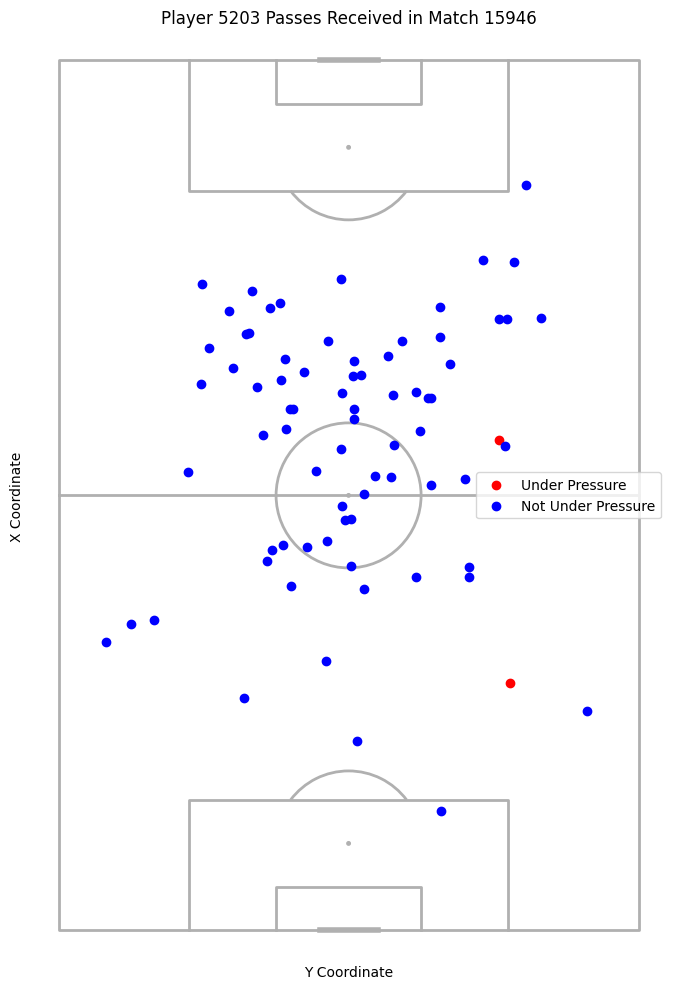

In [55]:
pitch = VerticalPitch(pitch_type='statsbomb')
fig, ax = pitch.draw(figsize=(7, 10))

under_pressure = player_passes_received.filter(pl.col("under_pressure") == True)
not_under_pressure = player_passes_received.filter(pl.col("under_pressure") == False)

ax.scatter(under_pressure['location_y'], under_pressure['location_x'], color='red', label='Under Pressure')
ax.scatter(not_under_pressure['location_y'], not_under_pressure['location_x'], color='blue', label='Not Under Pressure')


plt.title("Player 5203 Passes Received in Match 15946")
plt.xlabel("Y Coordinate")
plt.ylabel("X Coordinate")
plt.legend()
plt.show()

In [56]:
# Game Specific Pressure Stats
ba_pressure_stats = (
    ba_passes_received
    .group_by("player", "position")
    .agg([
        pl.sum("under_pressure").alias("under_pressure_count"),
        pl.count("under_pressure").alias("total_passes_received")
    ])
    .with_columns([
        (pl.col("under_pressure_count") / pl.col("total_passes_received") * 100).alias("pressure_percentage")
    ])
    .sort("pressure_percentage", descending=True)
)

ba_pressure_stats

player,position,under_pressure_count,total_passes_received,pressure_percentage
str,str,u32,u32,f64
"""Mubarak Wakaso""","""Right Defensive Midfield""",1,4,25.0
"""Philippe Coutinho Correia""","""Left Wing""",3,20,15.0
"""Adrián Marín Gómez""","""Left Midfield""",1,7,14.285714
"""Manuel Alejandro García Sánche…","""Left Center Midfield""",1,9,11.111111
"""Mubarak Wakaso""","""Right Center Midfield""",2,19,10.526316
"""Lionel Andrés Messi Cuccittini""","""Right Wing""",5,58,8.62069
"""Martín Aguirregabiria Padilla""","""Right Back""",1,13,7.692308
"""Ousmane Dembélé""","""Left Wing""",2,27,7.407407
"""Marc-André ter Stegen""","""Goalkeeper""",1,14,7.142857


In [57]:
# All Games Pressure Stats
pressure_stats = (
    passes_received
    .group_by("position")
    .agg([
        pl.sum("under_pressure").alias("under_pressure_count"),
        pl.count("under_pressure").alias("total_passes_received")
    ])
    .with_columns([
        (pl.col("under_pressure_count") / pl.col("total_passes_received") * 100).alias("pressure_percentage")
    ])
    .sort("pressure_percentage", descending=True)
)

pressure_stats

position,under_pressure_count,total_passes_received,pressure_percentage
str,u32,u32,f64
"""Right Center Forward""",12779,105449,12.118655
"""Center Forward""",31494,262378,12.003293
"""Left Center Forward""",12183,102743,11.857742
"""Secondary Striker""",98,827,11.85006
"""Center Attacking Midfield""",17096,151128,11.312265
"""Left Attacking Midfield""",1277,11414,11.188015
"""Center Midfield""",232,2084,11.132438
"""Left Wing""",21499,193747,11.09643
"""Right Wing""",21490,194396,11.054754


In [19]:
# Resulting outcome distribution from under_+pressure passes received. Need to do more heavy data engineering for this.

### Action Flow

In [58]:
# Barcelona vs Deportive Alaves - Match ID 15946
ba_all_actions = events.filter(pl.col("match_id") == 15946)

# Sergio Busquets in game 15946 - Player ID 5203
player_all_actions = ba_all_actions.filter(pl.col("player_id") == 5203)

In [59]:
player_all_actions.head()

id,index_num,period,minute,second,timestamp,duration,location_x,location_y,possession,possession_team_id,possession_team,out,off_camera,counterpress,under_pressure,type_id,type,match_id,team_id,team,player_id,player,position_id,position,play_pattern_id,play_pattern,shot_end_location_x,shot_end_location_y,shot_end_location_z,shot_statsbomb_xg,shot_outcome,shot_technique,shot_body_part,shot_type,shot_key_pass_id,shot_freeze_frame,…,dribble_overrun,dribble_no_touch,duel_type,duel_outcome,foul_committed_card,foul_committed_type,foul_committed_offensive,foul_committed_advantage,foul_committed_penalty,foul_won_defensive,foul_won_advantage,foul_won_penalty,goalkeeper_type,goalkeeper_outcome,goalkeeper_technique,goalkeeper_position,goalkeeper_body_part,goalkeeper_end_location_x,goalkeeper_end_location_y,clearance_body_part,clearance_aerial_won,clearance_head,clearance_left_foot,clearance_right_foot,interception_outcome,block_deflection,block_offensive,block_save_block,ball_recovery_offensive,ball_recovery_failure,miscontrol_aerial_won,substitution_replacement_id,substitution_replacement_name,substitution_outcome,fifty_fifty_outcome,bad_behaviour_card,injury_stoppage_in_chain
str,i32,i32,i32,i32,str,f32,f32,f32,i32,i32,str,bool,bool,bool,bool,i32,str,i32,i32,str,i32,str,i32,str,i32,str,f32,f32,f32,f32,str,str,str,str,str,str,…,bool,bool,str,str,str,str,bool,bool,bool,bool,bool,bool,str,str,str,str,str,f32,f32,str,bool,bool,bool,bool,str,bool,bool,bool,bool,bool,bool,i32,str,str,str,str,bool
"""be27cc25-92b5-4696-b43c-aad957…",11,1,0,7,"""00:00:07.152""",1.696529,33.599998,5.9,3,217,"""Barcelona""",false,false,false,true,30,"""Pass""",15946,217,"""Barcelona""",5203,"""Sergio Busquets i Burgos""",9,"""Right Defensive Midfield""",1,"""Regular Play""",null,null,null,null,null,null,null,null,null,null,…,false,false,null,null,null,null,false,false,false,false,false,false,null,null,null,null,null,null,null,null,false,false,false,false,null,false,false,false,false,false,false,null,null,null,null,null,false
"""8495291c-95ef-491d-834c-974d83…",68,1,1,16,"""00:01:16.595""",1.782612,79.0,74.400002,5,217,"""Barcelona""",false,false,false,false,30,"""Pass""",15946,217,"""Barcelona""",5203,"""Sergio Busquets i Burgos""",9,"""Right Defensive Midfield""",1,"""Regular Play""",null,null,null,null,null,null,null,null,null,null,…,false,false,null,null,null,null,false,false,false,false,false,false,null,null,null,null,null,null,null,null,false,false,false,false,null,false,false,false,false,false,false,null,null,null,null,null,false
"""6dc75c33-fcdb-496f-85fd-86efe8…",81,1,1,32,"""00:01:32.62""",null,77.5,24.1,5,217,"""Barcelona""",false,false,false,false,42,"""Ball Receipt*""",15946,217,"""Barcelona""",5203,"""Sergio Busquets i Burgos""",9,"""Right Defensive Midfield""",1,"""Regular Play""",null,null,null,null,null,null,null,null,null,null,…,false,false,null,null,null,null,false,false,false,false,false,false,null,null,null,null,null,null,null,null,false,false,false,false,null,false,false,false,false,false,false,null,null,null,null,null,false
"""d50aec76-9cc0-40a6-9eb5-6fd2a5…",82,1,1,32,"""00:01:32.62""",0.04,77.5,24.1,5,217,"""Barcelona""",false,false,false,false,43,"""Carry""",15946,217,"""Barcelona""",5203,"""Sergio Busquets i Burgos""",9,"""Right Defensive Midfield""",1,"""Regular Play""",null,null,null,null,null,null,null,null,null,null,…,false,false,null,null,null,null,false,false,false,false,false,false,null,null,null,null,null,null,null,null,false,false,false,false,null,false,false,false,false,false,false,null,null,null,null,null,false
"""22f4d181-fd17-4919-bce0-ee6de9…",83,1,1,32,"""00:01:32.66""",0.963959,78.099998,26.9,5,217,"""Barcelona""",false,false,false,false,30,"""Pass""",15946,217,"""Barcelona""",5203,"""Sergio Busquets i Burgos""",9,"""Right Defensive Midfield""",1,"""Regular Play""",null,null,null,null,null,null,null,null,null,null,…,false,false,null,null,null,null,false,false,false,false,false,false,null,null,null,null,null,null,null,nul

In [60]:
player_all_actions['type']

type
str
"""Pass"""
"""Pass"""
"""Ball Receipt*"""
"""Carry"""
"""Pass"""
"""Pass"""
"""Ball Receipt*"""
"""Pass"""
"""Ball Recovery"""


In [61]:
ball_receipt_events = ba_all_actions.filter(pl.col("type") == "Ball Receipt*")
player_actions_after_receipt = ba_all_actions.filter(
    (pl.col("player_id") == 5203) &  
    (pl.col("index_num") - 1).is_in(ball_receipt_events["index_num"].to_list())
)

action_distribution = player_actions_after_receipt.group_by("type").agg(
    pl.count("type").alias("action_count")
).sort("action_count", descending=True)

action_distribution

type,action_count
str,u32
"""Carry""",64
"""Pass""",12
"""Duel""",2
"""Interception""",1


In [62]:
# Can try to chain together player events based on the sequence of events. 
# For example, a player possesion would start with a "Ball Receipt*" event and end with a "Pass","Shot", or "Interception" event.
# More DE needed for this


In [63]:
def group_actions_by_possession(actions):
    possession_starts = {"Ball Receipt*"}
    possession_ends = {"Pass", "Shot", "Dispossessed"}
    
    possessions = []
    current_possession = []

    for action in actions.iter_rows(named=True):
        action_type = action["type"]

        # Filter only for specific action types
        if action_type not in {"Pass", "Shot", "Dispossessed", "Carry", "Ball Receipt*"}:
            continue
        current_possession.append(action)

        if action_type in possession_ends:
            possessions.append(current_possession)
            current_possession = []

    # If there are remaining actions in the current possession, add them as well
    if current_possession:
        possessions.append(current_possession)

    return possessions

Number of possessions: 84


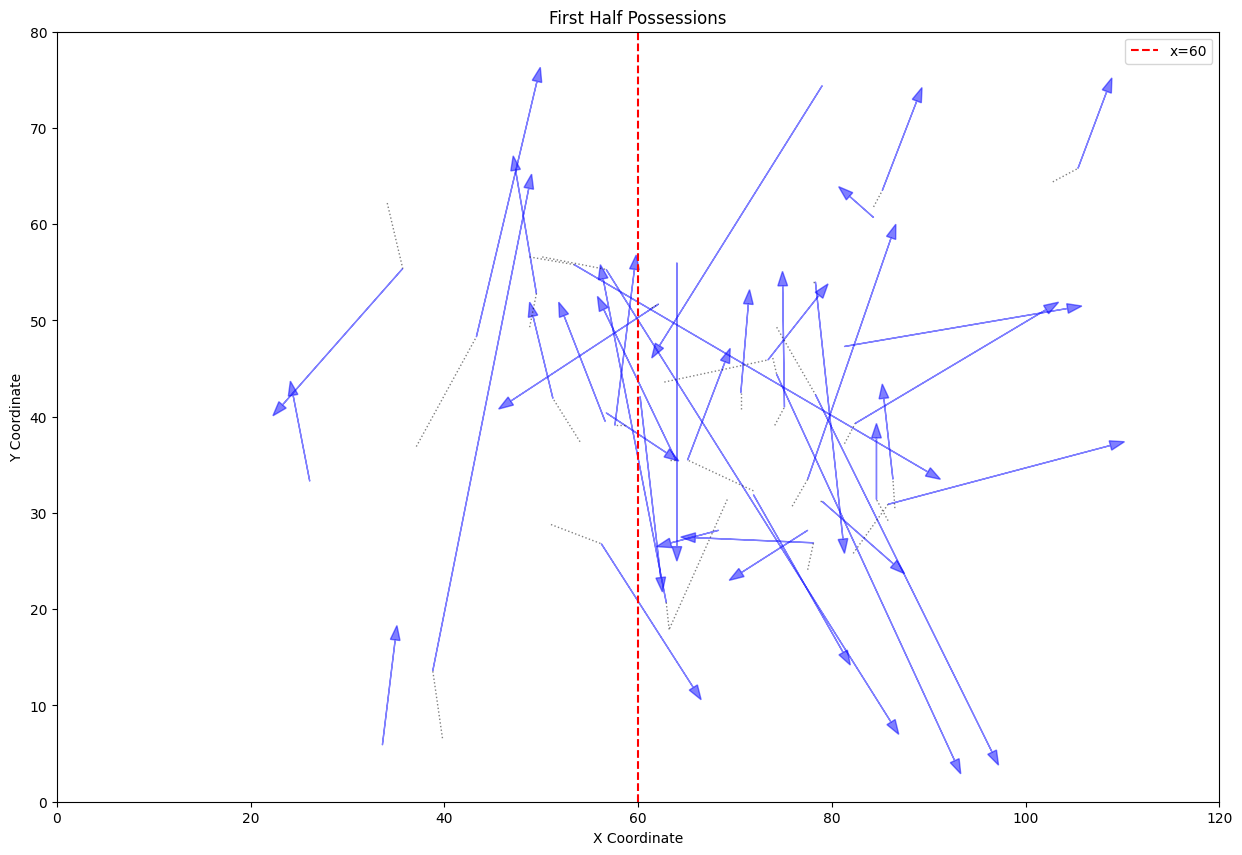

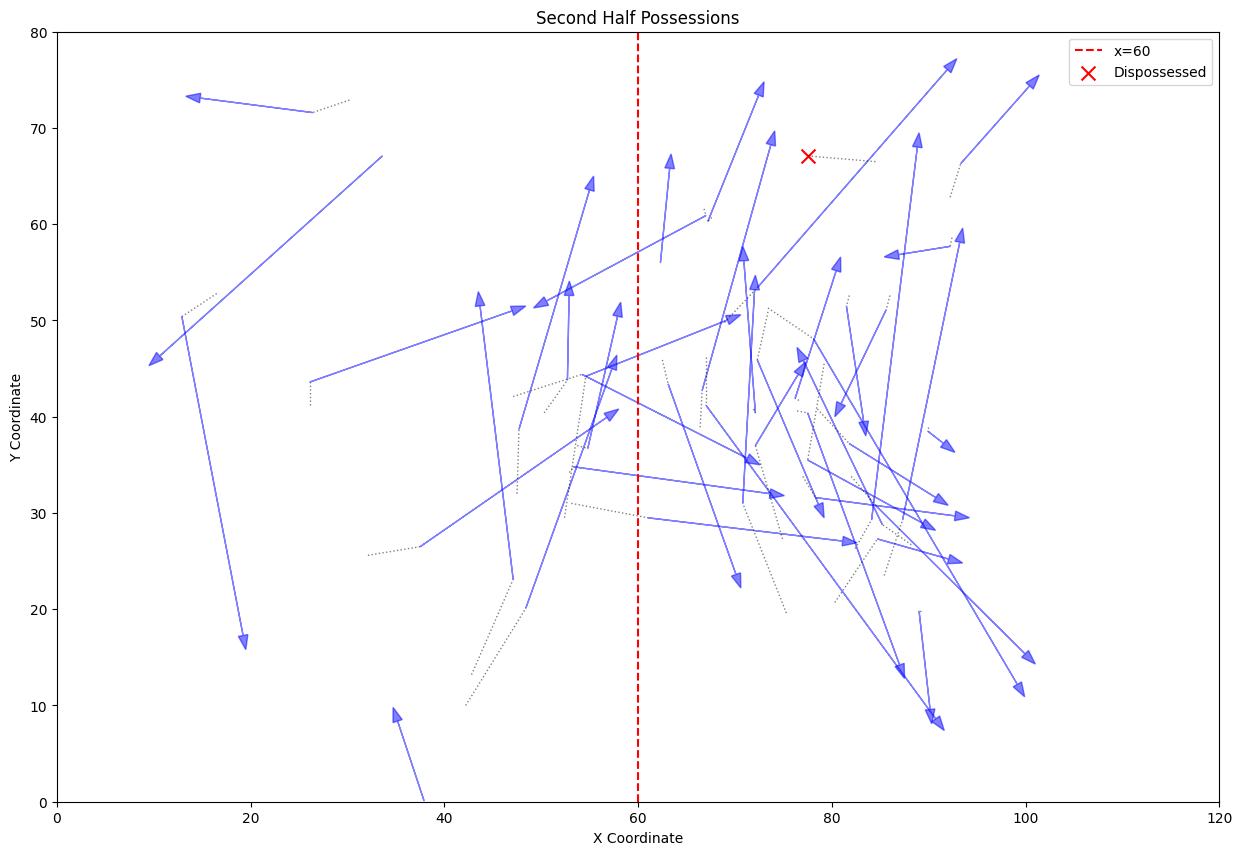

In [ ]:
# Example usage
player_actions = player_all_actions.select(["type", "minute", "second", "location_x", "location_y", "pass_end_location_x", "pass_end_location_y"])
grouped_possessions = group_actions_by_possession(player_actions)

print(f"Number of possessions: {len(grouped_possessions)}")

# Separate possessions into first half and second half
first_half_possessions = [possession for possession in grouped_possessions if possession[0]["minute"] < 45]
second_half_possessions = [possession for possession in grouped_possessions if possession[0]["minute"] >= 45]

# Plot first half possessions
pitch = Pitch(pitch_type='statsbomb')
fig, ax = pitch.draw(figsize=(10, 7))plt.title("First Half Possessions")


for possession in first_half_possessions:
    for i, action in enumerate(possession):
        start_x = action["location_x"]
        start_y = action["location_y"]
        if action["type"] == "Pass":
            end_x = action["pass_end_location_x"]
            end_y = action["pass_end_location_y"]
            plt.arrow(start_x, start_y, end_x - start_x, end_y - start_y, color='blue', head_width=1, length_includes_head=True, alpha=0.5)
        elif action["type"] == "Dispossessed":
            plt.scatter(start_x, start_y, color='red', marker='x', s=100, label='Dispossessed')
        else:
            if i < len(possession) - 1:
                next_action = possession[i + 1]
                end_x = next_action["location_x"]
                end_y = next_action["location_y"]
                plt.plot([start_x, end_x], [start_y, end_y], color='black', linestyle=':', linewidth=1, alpha=0.5)

plt.legend()
plt.show()

# Plot second half possessions
plt.figure(figsize=(15, 10))
plt.title("Second Half Possessions")


for possession in second_half_possessions:
    for i, action in enumerate(possession):
        start_x = action["location_x"]
        start_y = action["location_y"]
        if action["type"] == "Pass":
            end_x = action["pass_end_location_x"]
            end_y = action["pass_end_location_y"]
            plt.arrow(start_x, start_y, end_x - start_x, end_y - start_y, color='blue', head_width=1, length_includes_head=True, alpha=0.5)
        elif action["type"] == "Dispossessed":
            plt.scatter(start_x, start_y, color='red', marker='x', s=100, label='Dispossessed')
        else:
            if i < len(possession) - 1:
                next_action = possession[i + 1]
                end_x = next_action["location_x"]
                end_y = next_action["location_y"]
                plt.plot([start_x, end_x], [start_y, end_y], color='black', linestyle=':', linewidth=1, alpha=0.5)

plt.legend()
plt.show()


In [56]:
long_possessions = [possession for possession in second_half_possessions if len(possession) == 3]

for i, possession in enumerate(long_possessions, start=1):
    print(f"Possession {i} (Length: {len(possession)}):")
    for action in possession:
        print(action)
    print("\n")

Possession 1 (Length: 3):
{'type': 'Ball Receipt*', 'minute': 45, 'second': 1, 'location_x': 50.29999923706055, 'location_y': 40.400001525878906, 'pass_end_location_x': None, 'pass_end_location_y': None}
{'type': 'Carry', 'minute': 45, 'second': 1, 'location_x': 50.29999923706055, 'location_y': 40.400001525878906, 'pass_end_location_x': None, 'pass_end_location_y': None}
{'type': 'Pass', 'minute': 45, 'second': 2, 'location_x': 52.70000076293945, 'location_y': 43.79999923706055, 'pass_end_location_x': 52.900001525878906, 'pass_end_location_y': 54.099998474121094}


Possession 2 (Length: 3):
{'type': 'Ball Receipt*', 'minute': 45, 'second': 35, 'location_x': 84.5, 'location_y': 66.5, 'pass_end_location_x': None, 'pass_end_location_y': None}
{'type': 'Carry', 'minute': 45, 'second': 35, 'location_x': 84.5, 'location_y': 66.5, 'pass_end_location_x': None, 'pass_end_location_y': None}
{'type': 'Dispossessed', 'minute': 45, 'second': 39, 'location_x': 77.5, 'location_y': 67.0999984741211, '

In [61]:
# Dead ball possessions
one_possessions = [possession for possession in second_half_possessions if len(possession) == 1]

for i, possession in enumerate(one_possessions, start=1):
    print(f"Possession {i} (Length: {len(possession)}):")
    for action in possession:
        print(action)
    print("\n")

Possession 1 (Length: 1):
{'type': 'Pass', 'minute': 56, 'second': 29, 'location_x': 37.900001525878906, 'location_y': 0.10000000149011612, 'pass_end_location_x': 34.70000076293945, 'pass_end_location_y': 9.800000190734863}


Possession 2 (Length: 1):
{'type': 'Pass', 'minute': 67, 'second': 58, 'location_x': 33.599998474121094, 'location_y': 67.0999984741211, 'pass_end_location_x': 9.5, 'pass_end_location_y': 45.29999923706055}




## 360 Data

In [26]:
three_sixty = pl.read_parquet(DATA_DIR / "Statsbomb" / "three_sixty.parquet")
three_sixty.shape

(15584040, 9)

In [27]:
three_sixty.filter(pl.col("event_uuid") == "549567bd-36de-4ac8-b8dc-6b5d3f1e4be8").head()

match_id,id,event_uuid,teammate,actor,keeper,location_x,location_y,visible_area
i32,i32,str,bool,bool,bool,f32,f32,str
